In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
df = pd.read_parquet('data/green_tripdata_2021_jan.parquet')

In [27]:
dv = DictVectorizer()

In [50]:
def read_dataframe(filename):
    
    df = pd.read_parquet(filename)
    
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
    
    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
    
    df = df[((df.duration >= 1) & (df.duration < 60))]
    
    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str) 
    
    return df

In [23]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

In [28]:
 X_train

<73872x507 sparse matrix of type '<class 'numpy.float64'>'
	with 221616 stored elements in Compressed Sparse Row format>

In [29]:
target = 'duration'
y_train = df[target].values

In [30]:
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_train)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


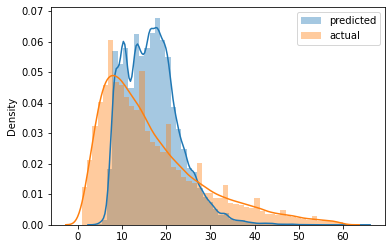

In [39]:
sns.distplot(y_pred, label='predicted' )
sns.distplot(y_train, label='actual' )

plt.legend()

In [45]:
mean_squared_error(y_train, y_pred, squared=False)

9.747441312330817

In [ ]:
lr = LinearRegression
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)